# Aula 2 (Parte 2) - Método da Bisseção

In [2]:
using Plots
gr(size=(600, 400))

Plots.GRBackend()

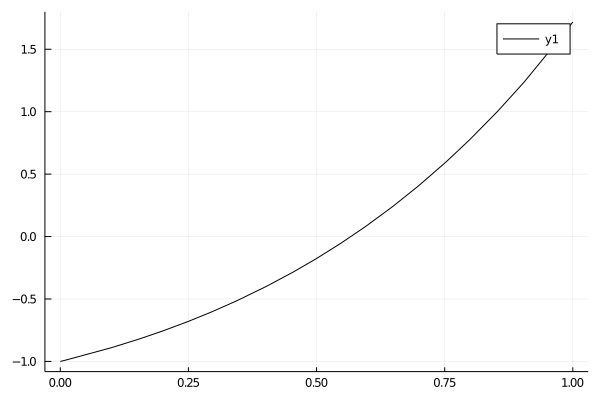

In [6]:
f(x) = exp(x) * x - 1
plot(f, 0, 1, c=:black)
# Corta no meio e vê que fica positivo pro lado crescente

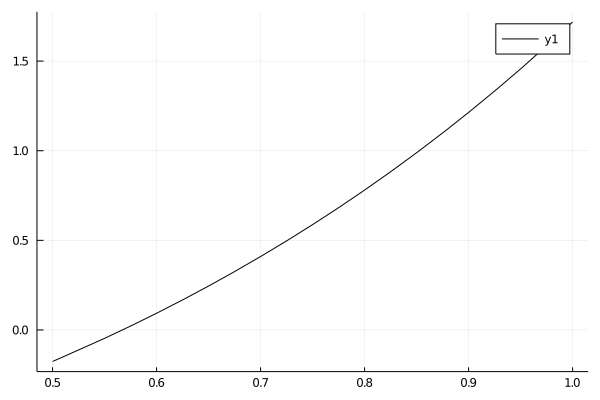

In [10]:
plot(f, 0.5, 1, c=:black)
# Corta mais uma vez no meio vendo se está próximo de 0

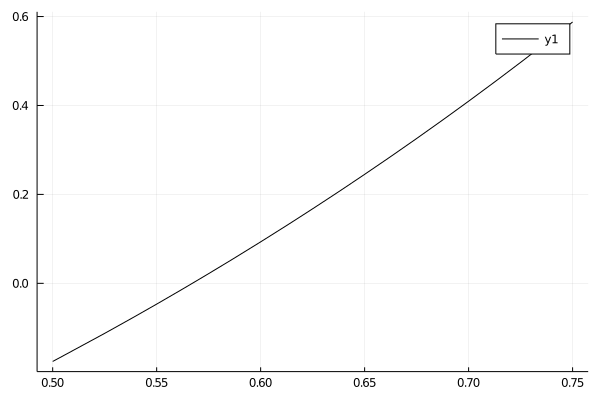

In [12]:
plot(f, 0.5, 0.75, c=:black)

In [13]:
# Método:
# Dado [a, b] com f(a)*f(b) < 0
# Escolhe c ϵ (a,b) (c = (a + b)/2)
# se f(x) = 0, fim
# senão então f(a)*f(c) < 0 ou f(c)*f(b) < 0, 
# logo escolho o intervalo correspondente e repito

In [14]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

(0.0, 1.0)

In [120]:
x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
x, f(x)

(0.567143290409784, 2.220446049250313e-16)

### Critérios de parada 

In [181]:
"""
    (x, fx, exitflag) = bisseccao(f, a, b)
"""
function bisseccao(f, a, b;
                   atol = 1e-8, rtol = 1e-8,
                   max_tempo = 10.0, max_iter = 1000,
                   )
    fa = f(a)
    fb = f(b)
    ϵ = atol + rtol * max(abs(fa), abs(fb))
    ϵba = atol + rtol * abs(b - a)
    if abs(fa) ≤ ϵ
        return a, fa, :sucesso
    elseif abs(fb) ≤ ϵ
        return b, fb, :sucesso
    elseif fa * fb ≥ 0
        return a, fa, :falha_sinais_opostos
    end
    
    x = (a + b) / 2
    fx = f(x)
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
    cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    while !(resolvido || cansado)
        if fa * fx < 0
            b = x
            fb = fx
        else
            a = x
            fa = fx
        end
        
        x = (a + b) / 2
        fx = f(x)
        
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
        cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    exitflag = :desconhecido
    if resolvido
        exitflag = :sucesso
    else
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    return x, fx, exitflag #plot(f, a, b)
end

bisseccao

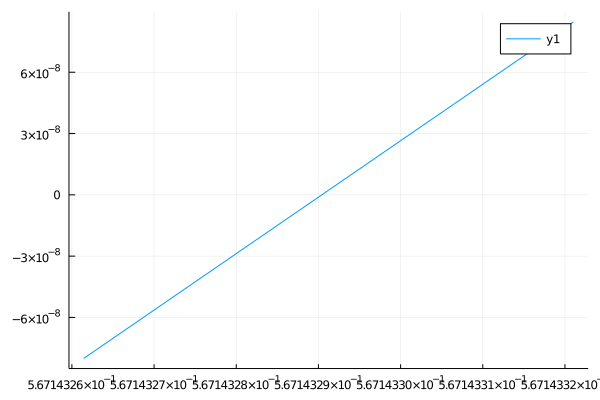

In [172]:
f(x) = exp(x) * x - 1
a, b = 0.0, 1.0
bisseccao(f, a, b)
#plot(f, a, b)

In [182]:
setprecision(512)
f(x) = x^2 - 2
a, b = big"1.0", big"2.0"
raiz1 = bisseccao(f, a, b, atol=1e-100, rtol=0.0)[1]

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157270652639468506542033758106760787262467057165468733028807

In [138]:
raiz2 = sqrt(big"2")

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586

In [155]:
(raiz1-raiz2)

-2.84874515458468766873437684479781125420724668097696477858816569758714417724690547242569767533341316200015950255487188921380071698818427941951484677784787558e-101

In [153]:
n = 48
V = 40_000
p = 1200
function eq_price(i)
    if i == 0
        return p - V / n
    else
        return p - V * (1 + i)^n * i / ((1 + i)^n - 1)
    end
end
bisseccao(eq_price, 0.0, 1.0)

(0.015990912914276123, 0.0002747942044152296, :sucesso)